In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
series=df.isnull().sum()/len(df)*100
print(series[series>0])
print("**************")
print(series[series>10])

print("----------------Test-----------------")
series=test.isnull().sum()/len(df)*100
print(series[series>0])
print("**************")
print(series[series>10])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64
**************
LotFrontage    17.739726
Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64
----------------Test-----------------
MSZoning         0.273973
LotFrontage     15.547945
Alley           92.602740
Utilities        0.136986
Exterior1st      0.068493
Exterior2nd      0.068493
MasVnrType       1.095890
MasVnrArea       1.027397
BsmtQual         3.013699
BsmtCond         3.082192
BsmtExposure 

In [6]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1,inplace=True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1,inplace=True)


In [7]:
series=df.isnull().sum()/len(df)*100
print(series[series>0])

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [8]:
df['FireplaceQu'].fillna('none',inplace=True)
test['FireplaceQu'].fillna('none',inplace=True)

In [9]:
df['LotFrontage'].fillna(value=df['LotFrontage'].mean(),inplace=True)
test['LotFrontage'].fillna(value=test['LotFrontage'].mean(),inplace=True)

In [10]:
garage_features=['GarageType','GarageFinish','GarageQual','GarageCond']
for colname in garage_features:
    df[colname].fillna('no garage',inplace=True)
    test[colname].fillna('no garage',inplace=True)

In [11]:
series=df.isnull().sum()/len(df)*100
print(series[series>0].index.tolist())

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageYrBlt']


In [12]:
correlation=df.corr()['SalePrice']
correlation=correlation[correlation>0.5]
best_features=correlation.index.tolist()
best_features=['Id']+best_features
print(best_features)

['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [13]:
df=df[best_features]
test=test[best_features[0:-1]]

In [14]:
series=test.isnull().sum()/len(df)*100
print(series[series>0])

test['TotalBsmtSF'].fillna(value=test['TotalBsmtSF'].mean(),inplace=True)
test['GarageCars'].fillna(value=test['GarageCars'].mean(),inplace=True)
test['GarageArea'].fillna(value=test['GarageArea'].mean(),inplace=True)

TotalBsmtSF    0.068493
GarageCars     0.068493
GarageArea     0.068493
dtype: float64


In [15]:
series=test.isnull().sum()/len(df)*100
print(series[series>0])


Series([], dtype: float64)


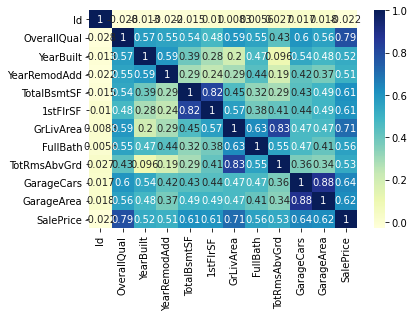

In [16]:
import seaborn as sns
g=sns.heatmap(df[best_features].corr(),annot=True,cmap="YlGnBu")

In [17]:
df.head(5)


,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,1,7,2003,2003,856,856,1710,2,8,2,548,208500
1,2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,3,7,2001,2002,920,920,1786,2,6,2,608,223500
3,4,7,1915,1970,756,961,1717,1,7,3,642,140000
4,5,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [18]:
test.head(5)

,Id,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,1461,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,1462,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,1463,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,1464,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,1465,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(['Id','SalePrice'],axis=1)
y=df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))

0.8000026580314374


In [21]:
pred=lr.predict(test.drop(['Id'],axis=1))

In [22]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
Submission=pd.DataFrame(data=pred,columns=['SalePrice'])
Submission['Id']=test['Id']
Submission=Submission[['Id','SalePrice']]

Submission.set_index('Id',inplace=True)

Submission.head(5)

,SalePrice
Id,
1461,109007.507692
1462,155555.628355
1463,170092.887999
1464,189225.820469
1465,218462.424022


In [23]:
len(Submission)

1459

In [24]:
Submission.to_csv('Submission.csv')